#### Compute tide corrections on pointCollection data objects

In [2]:
import glob
import re
import numpy as np
import pointCollection as pc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyTMD.compute_tide_corrections import compute_tide_corrections

#### Compute tides for a series of points

In [2]:
xlimits = np.array([-740000,520000])
ylimits = np.array([-1430000,-300000])
x=np.linspace(xlimits[0],xlimits[1],24)
y=np.linspace(ylimits[0],ylimits[1],24)
t=np.zeros((24))*3600
D = pc.data().from_dict({'x':x,'y':y,'t':t})
print(D)

<class 'pointCollection.data.data'> with shape (24,),
with fields:
['x', 'y', 't']


In [3]:
D.tide = compute_tide_corrections(D.x,D.y,D.t,
    DIRECTORY='/Volumes/ice1/tyler/tide_models',MODEL='CATS2008',
    EPOCH=(2000,1,1,0,0,0), TYPE='drift', TIME='utc')

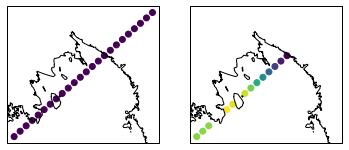

In [4]:
projection = ccrs.Stereographic(central_longitude=0.0,
    central_latitude=-90.0, true_scale_latitude=-71.0)
fig,(ax1,ax2) = plt.subplots(ncols=2,subplot_kw=dict(projection=projection))
ax1.scatter(D.x, D.y, c=D.t, transform=projection)
ax2.scatter(D.x, D.y, c=D.tide, transform=projection)
ax1.coastlines('10m')
ax2.coastlines('10m')

#### Compute tides for an image

In [5]:
x = np.arange(xlimits[0],xlimits[1]+10000,10000)
y = np.arange(ylimits[1],ylimits[0]-10000,-10000)
xgrid,ygrid = np.meshgrid(x,y)
t = 0.0
G = pc.data().from_dict({'x':xgrid,'y':ygrid,'t':t})
G.tide = compute_tide_corrections(G.x,G.y,G.t,
    DIRECTORY='/Volumes/ice1/tyler/tide_models',MODEL='CATS2008',
    EPOCH=(2000,1,1,0,0,0), TYPE='grid', TIME='utc')

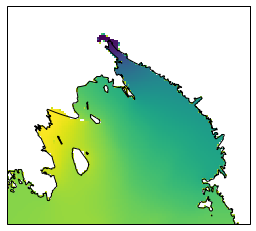

In [6]:
fig,ax3 = plt.subplots(num=2,subplot_kw=dict(projection=projection))
ax3.imshow(G.tide[:,:,0],extent=(xlimits[0],xlimits[1],ylimits[0],ylimits[1]),
    origin='upper', interpolation='nearest')
ax3.coastlines('10m')